In [47]:
import numpy as np # Libreria Matematica basica
import pandas as pd # Libreria para manejo, manipulacion y visualizacion de datos
from pandas import read_excel # funcion para leer archivos de excel


import matplotlib as mpl # Libreria para visualizacion de datos y graficas
import matplotlib.pyplot as plt   # Funcion para graficar
import seaborn as sns     

In [48]:
#!pip install sktime

In [49]:

import sktime
#from sktime import datasets
from sktime.datasets import load_airline
from sktime.utils import plot_series

In [50]:
path = r"C:\Users\Anselmo Daniel\Documents\Series de tiempo\AirlineSales.xls"  # Directorio en el que se encuentra el documento

df = pd.read_excel(path)
df.head(10)

,Dates,Observations
0,1971-01-01,112
1,1971-02-01,118
2,1971-03-01,132
3,1971-04-01,129
4,1971-05-01,121
5,1971-06-01,135
6,1971-07-01,148
7,1971-08-01,148
8,1971-09-01,136
9,1971-10-01,119


In [51]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Numero de Pasajeros', colores="", nombre_archivo="", dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=colores)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre_archivo)  
    plt.show()

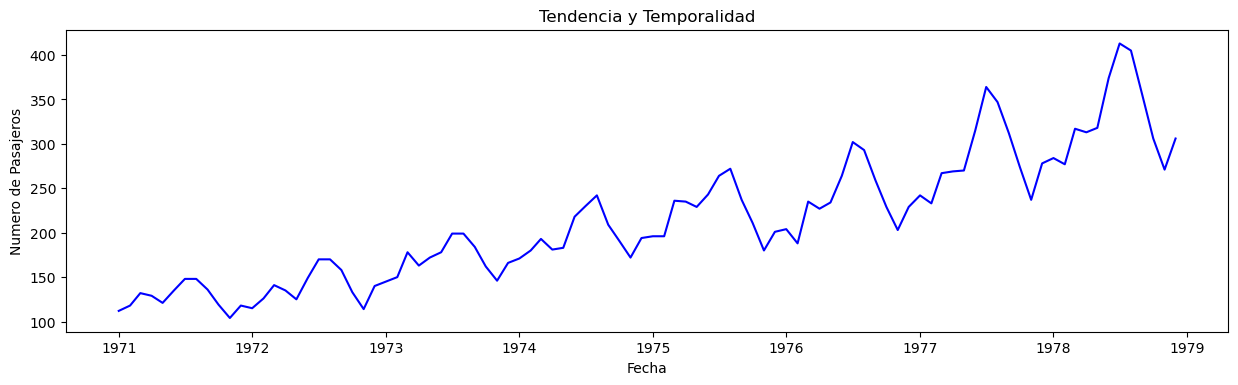

In [52]:
plot_df(df, x=df['Dates'], y=df['Observations'], title='Tendencia y Temporalidad', colores="blue", nombre_archivo="graf1ST")

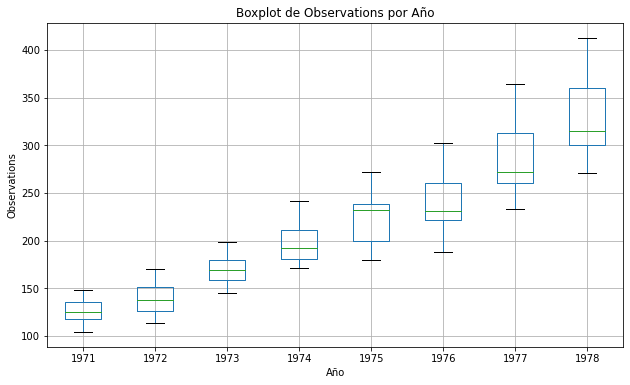

In [53]:
def boxplot_por_ano(df, fecha_col, valor_col):
    
    df[fecha_col] = pd.to_datetime(df[fecha_col])
    
    
    df['Año'] = df[fecha_col].dt.year
    

    df.boxplot(column=valor_col, by='Año', figsize=(10,6))

    plt.title(f"Boxplot de {valor_col} por Año")
    plt.suptitle("")  
    plt.xlabel("Año")
    plt.ylabel(valor_col)
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/graf2TS'
    plt.savefig(ruta)
    
    
    plt.show()


boxplot_por_ano(df, fecha_col='Dates', valor_col='Observations')

In [54]:
def plot_ts(df, x, y, MA, title="", xlabel='Fecha', ylabel='Numero de Pasajeros', colores="", dpi=100, nombre_archivo=""):
    ma = y.rolling(MA).mean()
    std_ma = y.rolling(MA).std()
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x, ma + std_ma, color="cyan")
    plt.plot(x, ma - std_ma, color="cyan")
    plt.fill_between(x, y1=ma + std_ma, y2=ma - std_ma, alpha=0.3, linewidth=2, color='cyan')
    plt.plot(x, ma, color="red", label="Media Movil")
    plt.plot(x, y, color=colores, label="Original")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(loc="best")
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre_archivo)
    plt.show()


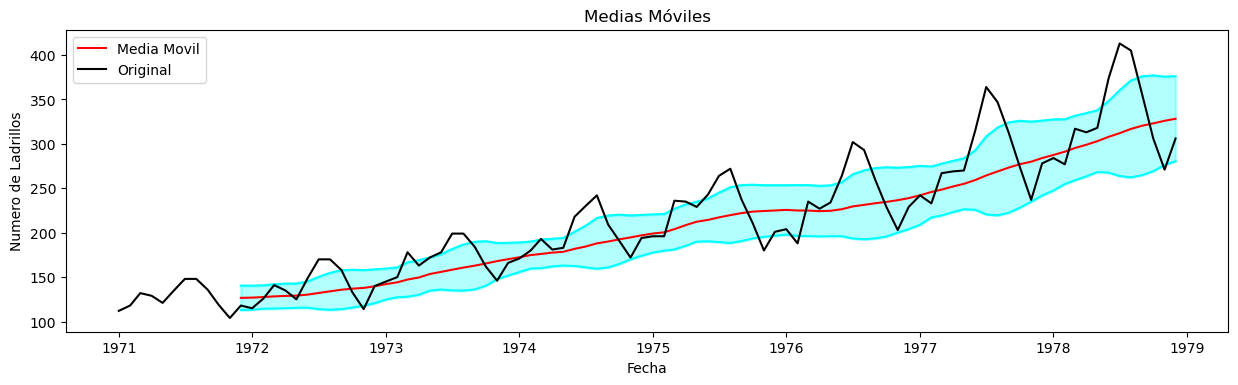

In [55]:
plot_ts(df,df['Dates'] ,df['Observations'], MA =12, title="Medias Móviles", xlabel='Fecha', ylabel='Numero de Ladrillos', colores="black",nombre_archivo="graf3TS")

## Problema 4

In [56]:
ruta_electricity = r"C:\Users\Anselmo Daniel\Documents\Series de tiempo\Electricity.xls"  # Directorio en el que se encuentra el documento
df_electricity = pd.read_excel(ruta_electricity)

ruta_clay_bricks = r"C:\Users\Anselmo Daniel\Documents\Series de tiempo\ClayBricks.xls"   # Directorio en el que se encuentra el documento
df_clay_bricks = pd.read_excel(ruta_clay_bricks)

## Método 1:
Estimación por minimos cuadrados de  𝑚𝑡

In [57]:
def ajustar_tendencia(df, columna_valores, columna_fechas, titulo_grafico, nombre1, nombre2):
    indices = np.arange(len(df))
    matriz_diseno = np.column_stack((np.ones(len(indices)), indices, indices**2))
    coeficientes = np.linalg.lstsq(matriz_diseno, df[columna_valores].values, rcond=None)[0]
    tendencia_ajustada = coeficientes[0] + coeficientes[1] * indices + coeficientes[2] * indices**2

    plt.figure(figsize=(15,4))
    plt.plot(df[columna_fechas], df[columna_valores].values, label="Serie Original", color="blue")
    plt.plot(df[columna_fechas], tendencia_ajustada, color="orange", label="Tendencia Cuadrática")
    plt.legend(loc="best")
    plt.title(f"{titulo_grafico}")
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre1)
    plt.show()

    residuos = df[columna_valores].values - tendencia_ajustada

    plt.figure(figsize=(15,4))
    plt.plot(df[columna_fechas], residuos, label="Residuos (Serie - Tendencia)", color="purple")
    plt.legend(loc="best")
    plt.title("Residuos")
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre2)
    plt.show()

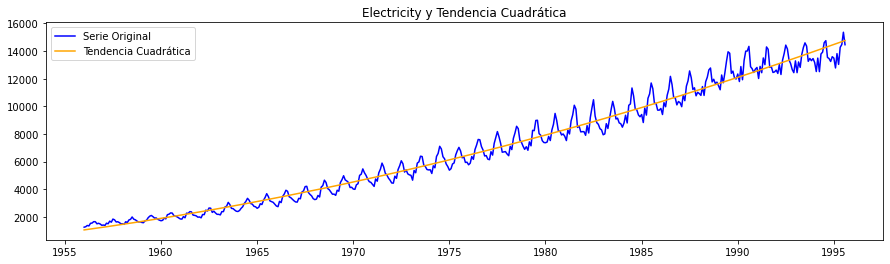

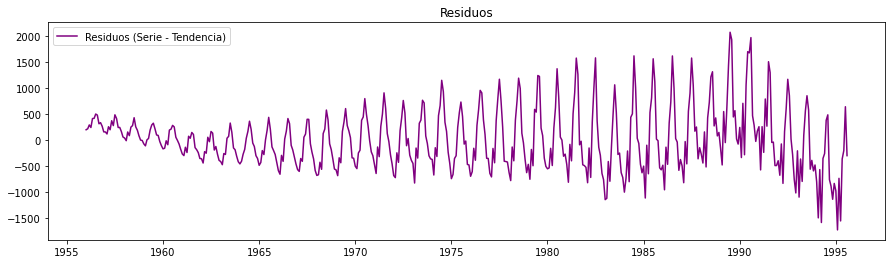

In [58]:
ajustar_tendencia(df_electricity, columna_valores = "Kwh", columna_fechas = "Month and year", titulo_grafico = "Electricity y Tendencia Cuadrática", nombre1 = "graf4_1ST", nombre2 = "graf4_2ST")

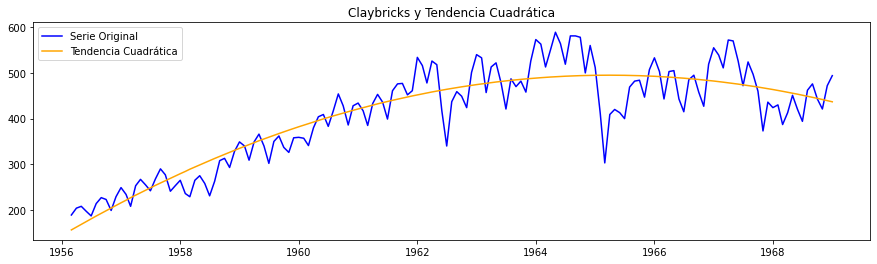

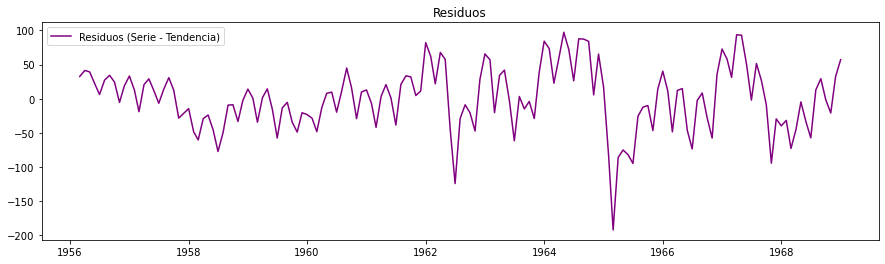

In [59]:
ajustar_tendencia(df_clay_bricks, columna_valores = "Bricks", columna_fechas = "Dates", titulo_grafico = "Claybricks y Tendencia Cuadrática", nombre1 = "graf5_1ST", nombre2 = "graf5_2ST")

### Método 2:
Suavizado mediante una media móvil

In [60]:
def suavizar_datos(df, ventana, alpha, columna_valores, columna_fechas, titulo_grafico,  nombre1 , nombre2, nombre3):
    n = len(df[columna_valores])

    tendencia_movil = np.zeros(n)

    for t in range(ventana+1, n-ventana):
        tendencia_movil[t] = sum(df[columna_valores][t-ventana:t+ventana]) / (2 * ventana + 1)

    tendencia_movil[:ventana] = tendencia_movil[ventana]
    tendencia_movil[n-ventana:] = tendencia_movil[n-ventana-1]

    plt.figure(figsize=(15,4))
    plt.plot(df[columna_fechas], df[columna_valores].values, label="Serie Original", color="blue")
    plt.plot(df[columna_fechas], tendencia_movil, label="Serie Suavizada (Media Móvil)", color="orange")
    plt.legend(loc="best")
    plt.title(titulo_grafico)
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre1)
    plt.show()

    residuos = df[columna_valores].values - tendencia_movil

    plt.figure(figsize=(15,4))
    plt.plot(df[columna_fechas], residuos, label="Residuos (Serie - Tendencia)", color="purple")
    plt.legend(loc="best")
    plt.title("Residuos después de eliminar la tendencia")
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre2)
    plt.show()

    tendencia_exponencial = np.zeros(n)
    tendencia_exponencial[0] = tendencia_movil[0]

    for t in range(1, n):
        tendencia_exponencial[t] = alpha * df[columna_valores][t] + (1 - alpha) * tendencia_movil[t-1]

    plt.figure(figsize=(15,4))
    plt.plot(df[columna_fechas], df[columna_valores], label="Serie Original", color="blue")
    plt.plot(df[columna_fechas], tendencia_exponencial, label="Serie Suavizada (Exponencial)", color="orange")
    plt.legend(loc="best")
    plt.title("Serie Suavizada Exponencial")
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre3)
    plt.show()

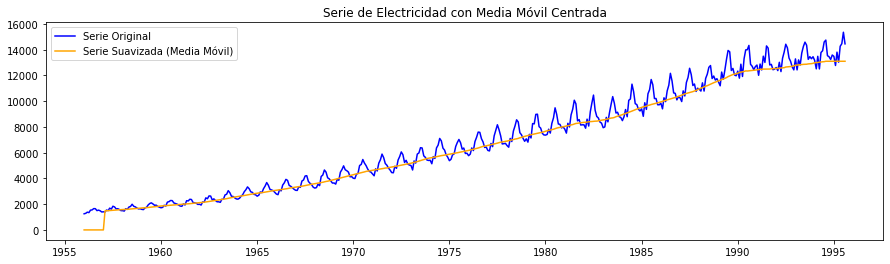

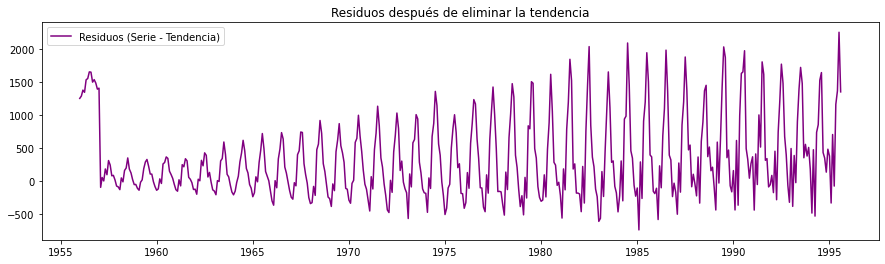

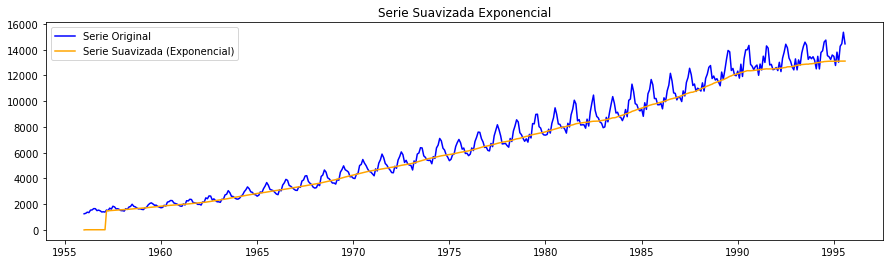

In [61]:
suavizar_datos(df_electricity, ventana=12, alpha=0.01, columna_valores="Kwh", columna_fechas="Month and year", titulo_grafico="Serie de Electricidad con Media Móvil Centrada", nombre1 = "graf6_1ST", nombre2 = "graf6_2ST", nombre3 = "graf6_3ST")

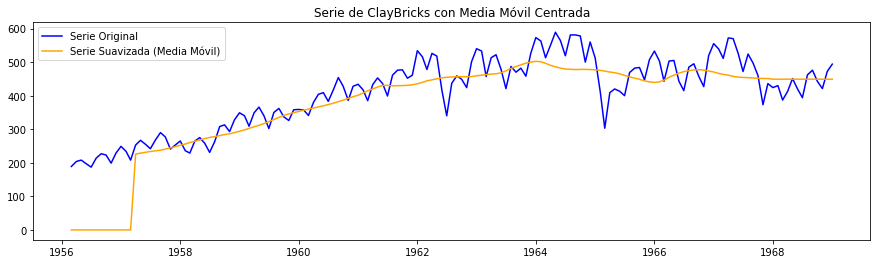

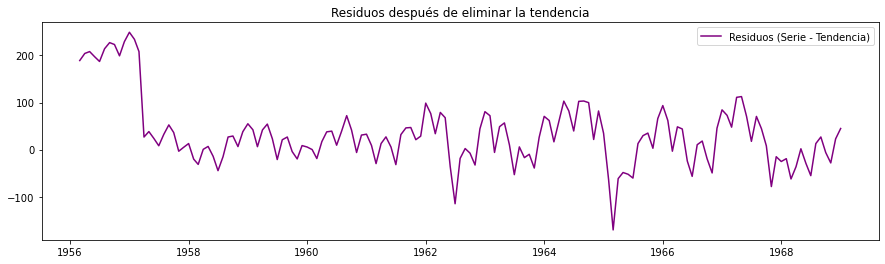

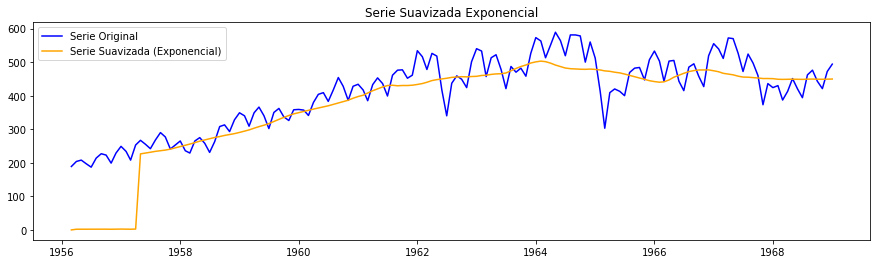

In [62]:
suavizar_datos(df_clay_bricks, ventana=12, alpha=0.01, columna_valores="Bricks", columna_fechas="Dates", titulo_grafico="Serie de ClayBricks con Media Móvil Centrada",  nombre1 = "graf7_1ST", nombre2 = "graf7_2ST", nombre3 = "graf7_3ST")

## Método 3
Diferenciación para Generar Datos Estacionarios

In [63]:
def metodo3(df, index_v, dates_v, label_title, nombre):
    n = df[index_v].size

    segunda_diferencia = np.zeros(n-2)
    for t in range(2, n):
        segunda_diferencia[t-2] = df[index_v][t] - 2 * df[index_v][t-1] + df[index_v][t-2]

    plt.figure(figsize=(15,4))
    plt.plot(df[dates_v][2:], segunda_diferencia, label="Segunda Diferencia Manual", color='magenta')
    plt.legend(loc="best")
    plt.title(label_title)
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre)
    plt.show()

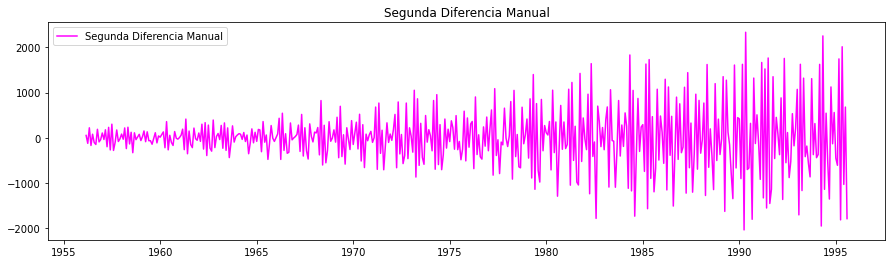

In [64]:
metodo3(df_electricity, index_v = "Kwh", dates_v = "Month and year", label_title = "Segunda Diferencia Manual", nombre = "graf7ST")

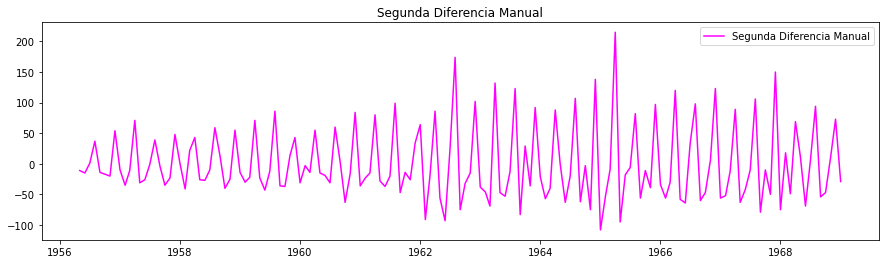

In [65]:
metodo3(df_clay_bricks, index_v = "Bricks", dates_v = "Dates", label_title = "Segunda Diferencia Manual",  nombre = "graf8ST")

In [66]:
def s1(df, index_v, dates_v, nombre):
    df[dates_v] = pd.to_datetime(df[dates_v])
    
    df['month'] = df[dates_v].dt.month
    df['year'] = df[dates_v].dt.year

    df['Trend'] = df.groupby('year')[index_v].transform('mean')

    df['Detrended'] = df[index_v] - df['Trend']

    seasonal_factors = df.groupby('month')['Detrended'].mean()

    df['Seasonal'] = df['month'].map(seasonal_factors)

    df['Residual'] = df[index_v] - df['Trend'] - df['Seasonal']

    plt.figure(figsize=(15,4))
    sns.lineplot(x=df[dates_v], y=df['Residual'], label='Residuos', color='teal')
    plt.title('Residuos')
    plt.ylabel('Residuos')
    plt.xlabel('Mes y Año')
    plt.legend()
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre)
    plt.show()

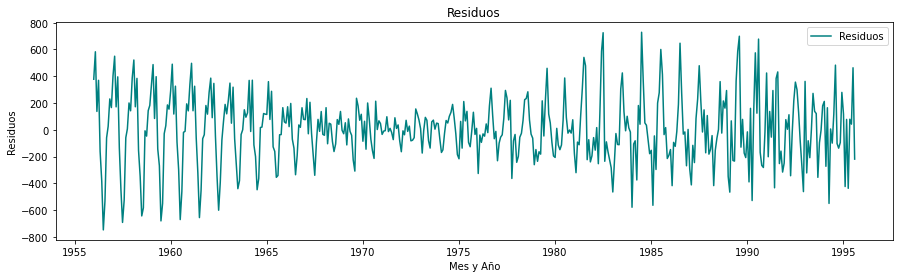

In [67]:
s1(df_electricity, index_v = "Kwh", dates_v = "Month and year", nombre = "graf9TS")

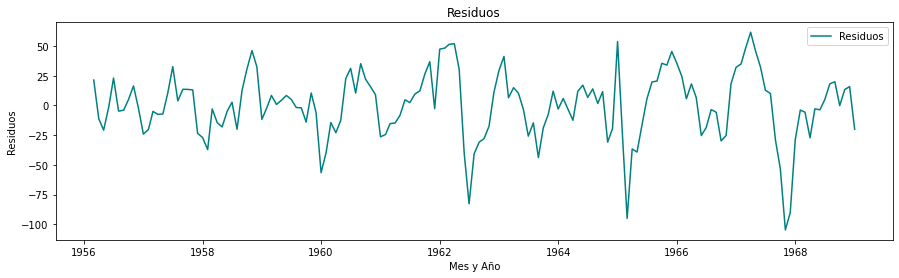

In [68]:
s1(df_clay_bricks, index_v = "Bricks", dates_v = "Dates", nombre = "graf10TS")


In [69]:
# Estimación de la tendencia utilizando media móvil
def moving_average_trend(x, d, q, n):
    trend = []
    for t in range(q, n - q):
        mt = ( 0.5*x[t-q] + sum( x[t - q + 1:t + q - 1] ) + 0.5*x[t+q] )/d
        trend.append(mt)
    return trend

In [70]:
def average_deviations(d, j, x, m, n, q):
    wk = []
    for k in range(d):
        index = k + j*d
        if index in range(q, n - q):
            wk.append( x[index] - m[index] )
    return wk

In [71]:
def estimate_seasonal_component(w, d, n):
    media = np.mean(w)
    sk = np.zeros(n)
    for k in range(d):
        sk[k] = w[k] - media
    for k in range(d, n):
        sk[k] = sk[k-d]
    return sk

In [72]:
def s2(df, d, j, index_v, nombre):
    n = df[index_v].size
    q = (d - 1) // 2 if d % 2 != 0 else d // 2

    m_t = moving_average_trend(df[index_v], d, q, n)
    w_k = average_deviations(d, j, df[index_v], m_t, n, q)
    s_k = estimate_seasonal_component(w_k, d, n)
    
    d_t = df[index_v] - s_k

    # **Parte 2: Reestimar la tendencia a partir de los datos deseasonalizados**
    # Usamos la misma función de media móvil para reestimar la tendencia, pero ahora sobre d_t
    m_t_reestimado = moving_average_trend(d_t, d, q, n)

    # Graficar los resultados
    plt.figure(figsize=(12, 8))
    plt.plot(df[index_v], label='Datos Originales')
    # plt.plot(m_t, label='Tendencia Estimada')
    plt.plot(m_t_reestimado, label='Tendencia Reestimada')
    plt.legend()
    ruta = 'C:/Users/Anselmo Daniel/Documents/Series de tiempo/'
    plt.savefig(ruta + nombre)
    plt.show()

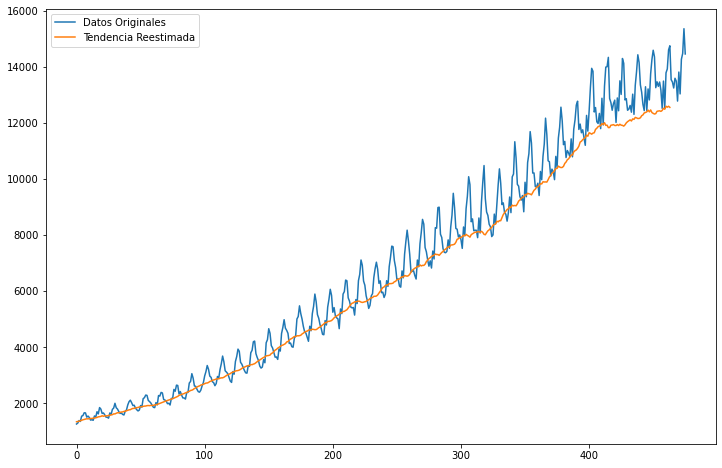

In [73]:
s2(df_electricity, d = 12, j = 6, index_v = "Kwh", nombre = "graf11TS")

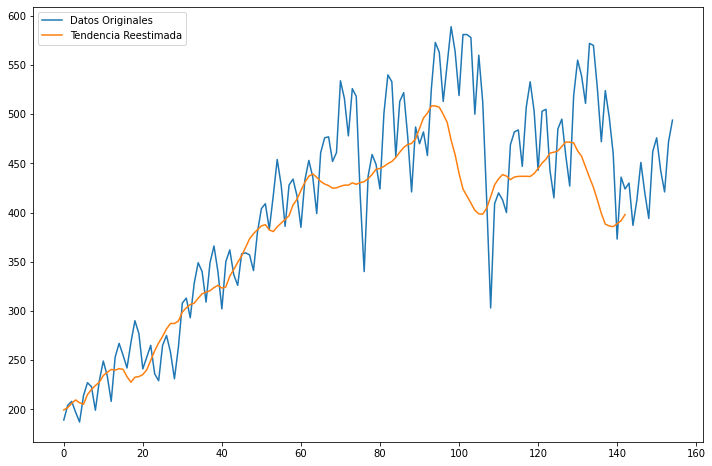

In [74]:
s2(df_clay_bricks, d = 12, j = 6, index_v = "Bricks", nombre = "graf12TS")